In [1]:
import setup

time: 13.3 ms (started: 2021-04-09 16:38:40 +02:00)


In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

time: 271 ms (started: 2021-04-09 16:38:40 +02:00)


In [3]:
from experiments.run import run
from experiments.post_processing import post_process

time: 402 ms (started: 2021-04-09 16:38:40 +02:00)


In [4]:
from experiments.revenue_yields_vs_network_inflation.experiment import experiment
results, exceptions = run(experiment)

Running experiment
Experiment complete
time: 14.9 s (started: 2021-04-09 16:38:41 +02:00)


In [5]:
df = pd.DataFrame(results)
df = post_process(df)
df

,eth_price,eth_supply,eth_staked,supply_inflation,average_effective_balance,number_of_validators,number_of_validators_online,number_of_validators_offline,base_reward,validating_rewards,...,diy_hardware_profit_yields,diy_cloud_profit_yields,pool_staas_profit_yields,pool_hardware_profit_yields,pool_cloud_profit_yields,staas_full_profit_yields,staas_self_custodied_profit_yields,supply_inflation_pct,total_revenue_yields_pct,total_profit_yields_pct
1,25,1.120000e+08,5.242880e+05,-3.668750e-07,3.200000e+10,16384,16057,327,89440.0,1.436138e+09,...,0.067551,0.183630,0.186002,0.139458,0.071660,0.179661,0.186002,-0.000037,21.136558,13.674515
2,25,1.120000e+08,5.291187e+05,9.890656e-04,3.199988e+10,16535,16205,330,89024.0,1.442634e+09,...,0.066568,0.182648,0.185138,0.138476,0.070677,0.178826,0.185138,0.098907,21.038372,13.581615
3,25,1.120000e+08,5.339494e+05,9.935435e-04,3.199982e+10,16686,16353,333,85839.0,1.403725e+09,...,0.059043,0.175123,0.178515,0.130951,0.063152,0.172430,0.178515,0.099354,20.285833,12.869697
4,25,1.120000e+08,5.387801e+05,9.667409e-04,3.199976e+10,16837,16501,336,85467.0,1.410291e+09,...,0.058164,0.174244,0.177743,0.130072,0.062273,0.171683,0.177743,0.096674,20.198034,12.786625
5,25,1.120000e+08,5.436107e+05,9.712668e-04,3.199965e+10,16988,16649,339,85064.0,1.416231e+09,...,0.057213,0.173293,0.176906,0.129121,0.061322,0.170875,0.176906,0.097127,20.102907,12.696620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13693,1500,1.120483e+08,3.358068e+07,7.662670e-03,3.199144e+10,1049677,1028722,20955,10819.0,1.112974e+10,...,0.023175,0.025110,0.022504,0.024374,0.023244,0.021737,0.022504,0.766267,2.557286,2.313820
13694,1500,1.120483e+08,3.358551e+07,7.663773e-03,3.199144e+10,1049828,1028870,20958,10819.0,1.113134e+10,...,0.023175,0.025110,0.022504,0.024374,0.023244,0.021737,0.022504,0.766377,2.557286,2.313820
13695,1500,1.120483e+08,3.359034e+07,7.664875e-03,3.199144e+10,1049979,1029018,20961,10819.0,1.113295e+10,...,0.023175,0.025110,0.022504,0.024374,0.023244,0.021737,0.022504,0.766487,2.557286,2.313820
13696,1500,1.120483e+08,3.359517e+07,7.665977e-03,3.199144e+10,1050130,1029166,20964,10819.0,1.113455e+10,...,0.023175,0.025110,0.022504,0.024374,0.023244,0.021737,0.022504,0.766598,2.557286,2.313820


time: 4.33 s (started: 2021-04-09 16:38:56 +02:00)


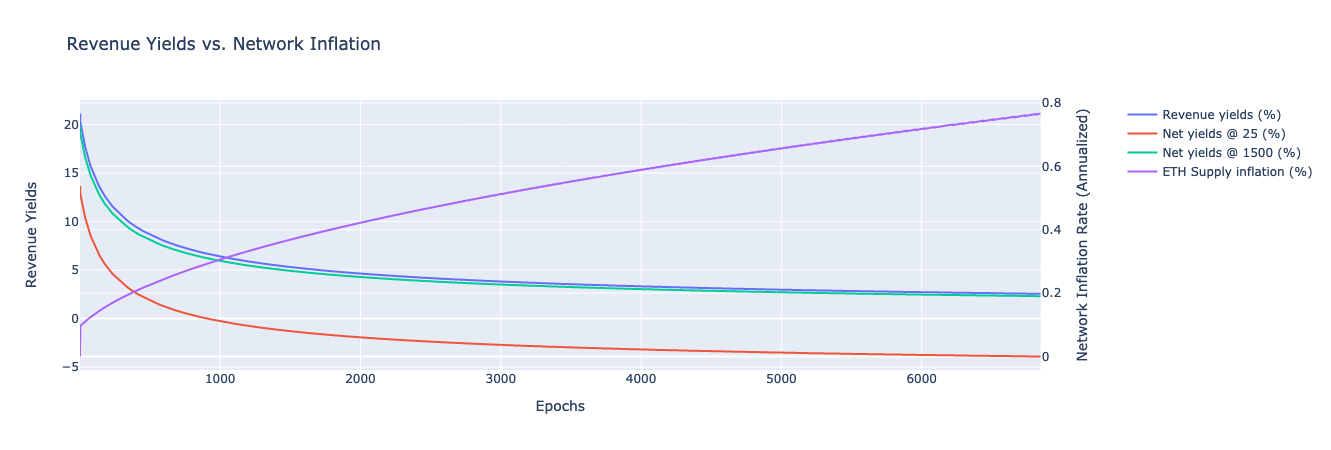

time: 433 ms (started: 2021-04-09 16:39:00 +02:00)


In [6]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

df_subset_0 = df.query("subset == 0")
df_subset_1 = df.query("subset == 1")

# Add traces
fig.add_trace(
    go.Scatter(x=df_subset_0.timestep, y=df_subset_0.total_revenue_yields_pct, name="Revenue yields (%)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_subset_0.timestep, y=df_subset_0.total_profit_yields_pct, name="Net yields @ 25 (%)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_subset_1.timestep, y=df_subset_1.total_profit_yields_pct, name="Net yields @ 1500 (%)"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_subset_0.timestep, y=df_subset_0.supply_inflation_pct, name="ETH Supply inflation (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Revenue Yields vs. Network Inflation"
)

# Set x-axis title
fig.update_xaxes(title_text="Epochs")

# Set y-axes titles
fig.update_yaxes(title_text="Revenue Yields", secondary_y=False)
fig.update_yaxes(title_text="Network Inflation Rate (Annualized)", secondary_y=True)

fig.show()